In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

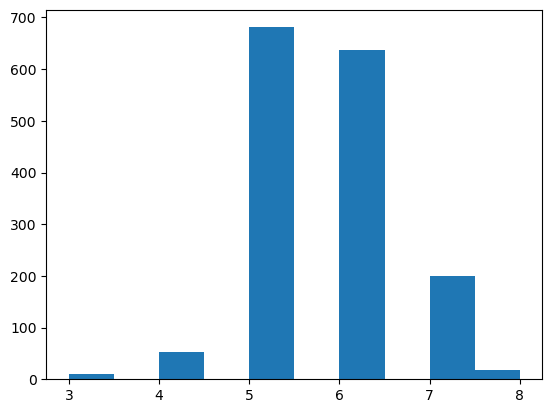

In [13]:
plt.hist(data.quality)

<Axes: xlabel='chlorides', ylabel='density'>

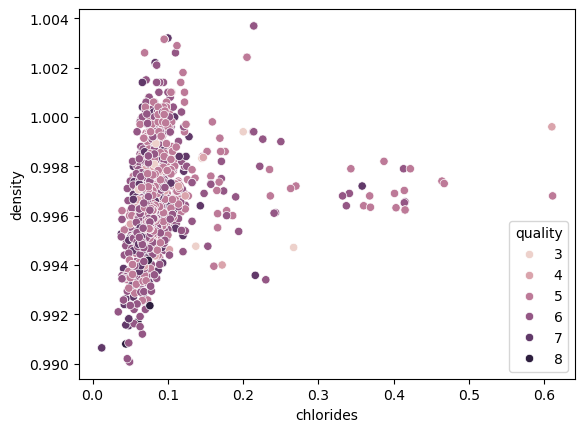

In [17]:
sns.scatterplot(x = "chlorides", y = "density", hue = "quality", data = data)

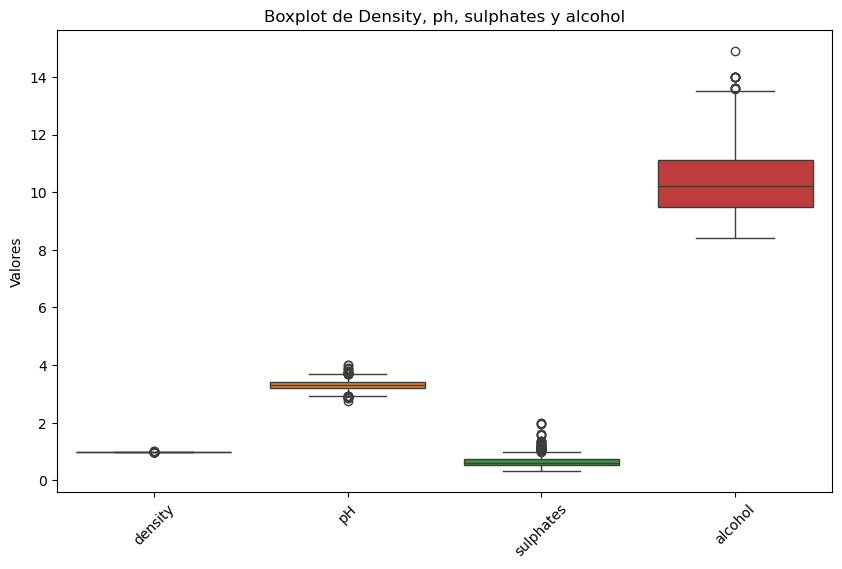

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['density', 'pH', 'sulphates', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de Density, ph, sulphates y alcohol')
plt.ylabel('Valores')
plt.show()

In [21]:
predictors_col = ["density", "pH", "sulphates", "alcohol"]
target_col = ['quality']

In [23]:
predictors = data[predictors_col]
target = data[target_col]

In [25]:
predictors

,density,pH,sulphates,alcohol
0,0.99780,3.51,0.56,9.4
1,0.99680,3.20,0.68,9.8
2,0.99700,3.26,0.65,9.8
3,0.99800,3.16,0.58,9.8
4,0.99780,3.51,0.56,9.4
...,...,...,...,...
1594,0.99490,3.45,0.58,10.5
1595,0.99512,3.52,0.76,11.2
1596,0.99574,3.42,0.75,11.0
1597,0.99547,3.57,0.71,10.2


In [27]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [29]:
corr = predictors.corr()
corr

,density,pH,sulphates,alcohol
density,1.000000,-0.341699,0.148506,-0.496180
pH,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.496180,0.205633,0.093595,1.000000


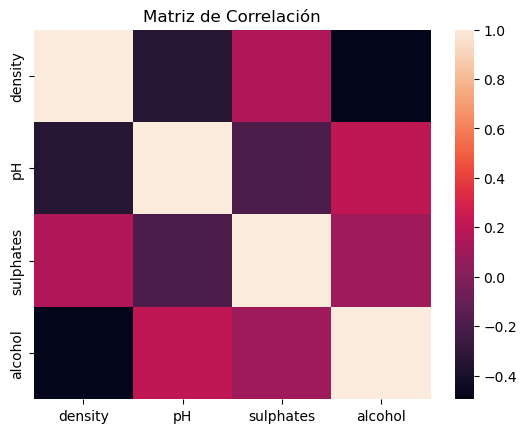

In [31]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [35]:
tree = DecisionTreeClassifier()

In [37]:
arbol = tree.fit(X_train, y_train)

[Text(0.535572533387844, 0.9791666666666666, 'x[3] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2219403399135615, 0.9375, 'x[2] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.3787564366507028, 0.9583333333333333, 'True  '),
 Text(0.05248608028657088, 0.8958333333333334, 'x[3] <= 9.533\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.02305026671339018, 0.8541666666666666, 'x[3] <= 9.075\ngini = 0.206\nsamples = 89\nvalue = [0, 5, 79, 5, 0, 0]'),
 Text(0.009967682903087645, 0.8125, 'x[2] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.0049838414515438224, 0.7708333333333334, 'x[1] <= 3.345\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.0024919207257719112, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.0074757621773157345, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),


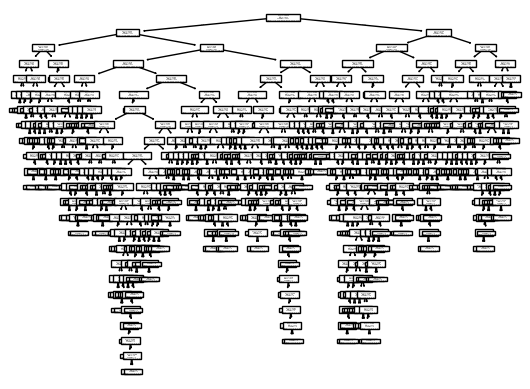

In [39]:
plot_tree(arbol)

In [41]:
predicciones = arbol.predict(X_test)

In [43]:
predicciones

array([7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 6, 5, 6,
       7, 5, 6, 5, 6, 6, 5, 7, 6, 7, 5, 6, 4, 7, 5, 5, 6, 7, 5, 5, 6, 6,
       5, 5, 6, 8, 6, 6, 5, 6, 6, 5, 7, 5, 6, 7, 3, 5, 6, 5, 5, 6, 6, 7,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6,
       7, 6, 6, 6, 6, 6, 6, 6, 5, 4, 6, 5, 7, 6, 6, 5, 7, 6, 6, 6, 5, 7,
       4, 7, 5, 5, 5, 5, 7, 7, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 8, 4, 5, 5, 6, 5, 5, 8, 5, 5,
       5, 4, 6, 6, 6, 5, 3, 6, 6, 4, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 4, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 8, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7,
       5, 5, 6, 6, 7, 6, 5, 4, 4, 7, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 7, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5,
       7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 4, 5, 5, 5,

In [45]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,3,4,1,0,0
5,0,7,102,32,5,0
6,2,2,30,74,14,2
7,0,0,6,15,13,1
8,0,0,0,4,1,1


In [47]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.603125

In [49]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6070410492285492

In [51]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.603125

In [53]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6045286764705882